# Zhlukovanie

In [1]:
#important modules for working with data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules to help process the data
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.decomposition import PCA

#modules for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#modules for agglomerative hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# Načítanie a úprava dát

In [2]:
df = pd.read_csv('CC GENERAL.csv', index_col='CUST_ID')

print(df.shape)
df.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Zistíme, koľko chýbajúcich záznamov sa nachádza v datasete.

In [4]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

Zbavíme sa chýbajúcich dát

In [5]:
#only single entry with missing value, so we can drop it
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

#filled with mean value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [6]:
#quick check if no NaN values remain
df.isnull().sum().sum()

0

Z mapy korelácie vidíme, že niektoré príznaky sú **pozitívne korelované**.

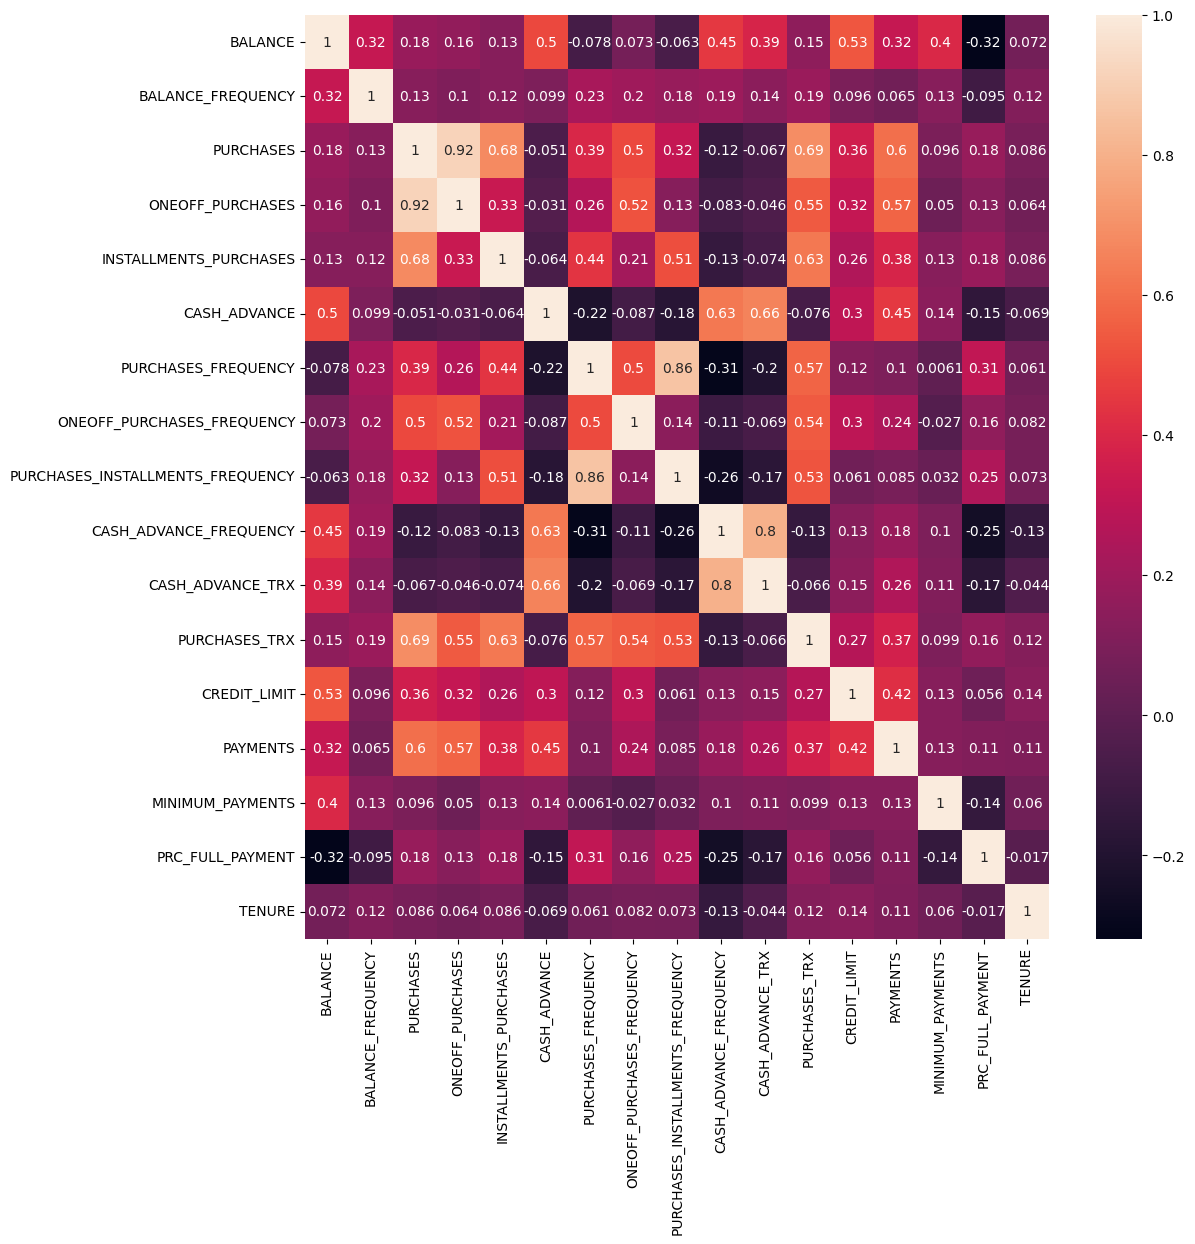

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Naškálujeme dáta pomocou **MinMaxScaler** a znížime dimenziu dát pomocou **PCA** (Principal Component Analysis).

In [8]:
#scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

#reduce the data dimensions to 2
pca = PCA(n_components=2)
X = pca.fit_transform(data_scaled)

PCA1 = X[:, 0]
PCA2 = X[:, 1]

# Algoritmus k-means

Vytvoríme vlastn=ú implementáciu algoritmu **kmeans**.

In [9]:
def kmeans(X, k):
    #randomly choose k points, and declare them as centres of clusters
    centroids = X[np.random.choice(X.shape[0], k, replace=True)]

    while True:
        #calculate euclidian distance from every point to all centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        #choose closest centroid to all points
        labels = np.argmin(distances, axis=0)

        #find new centroids as mean of all points in cluster
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        #if new centroids are almost the same as old ones, break the cycle
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

Vizualizácia dát so štyrmi zhlukmi.

<AxesSubplot: >

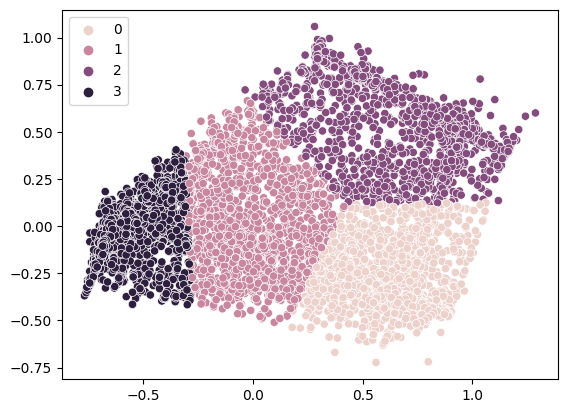

In [10]:
_, labels = kmeans(X, k=4)
sns.scatterplot(x=PCA1, y=PCA2, hue=labels, data=X)

Vizualizácia dát so štyrmi zhlukmi, ale dáta boli rozdelené pomocou funkcie **KMeans** zo sklearn.

<AxesSubplot: >

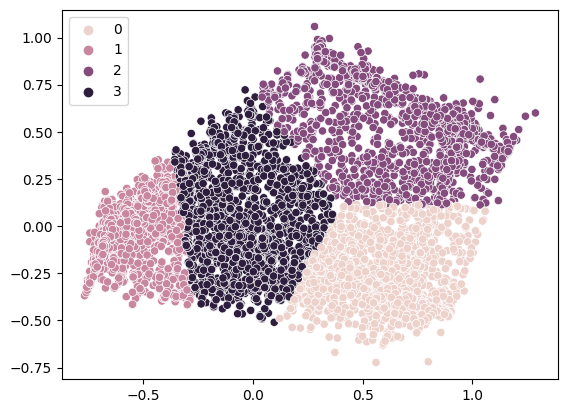

In [11]:
kmeans_ = KMeans(n_clusters=4, random_state=42)
kmeans_.fit(X)
sns.scatterplot(x=PCA1, y=PCA2, hue=kmeans_.labels_, data=X)

Naša implementácia má veľmi podobné výsledky implementácii z knižnice sklearn.

# Určovanie optimálnej hodnoty $k$

In [12]:
def kmeans_inertias(X, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        centroids, labels = kmeans(X, k)
        inertia = 0
        
        #calculate inertia for current k
        for i, label in enumerate(labels):
            distance = np.linalg.norm(X[i] - centroids[label])
            inertia += distance ** 2
        
        #add inertia to list of all inertias
        inertias.append(inertia)
    
    return inertias

In [13]:
custom_inertias = kmeans_inertias(X)

In [14]:
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range (1, 11)]
inertias_sklearn = [model.inertia_ for model in kmeans_models]

Zobrazíme hodnotu účelovej funkce v závislosti na $k$ a budeme hľadať bod zlomu (lakeť).

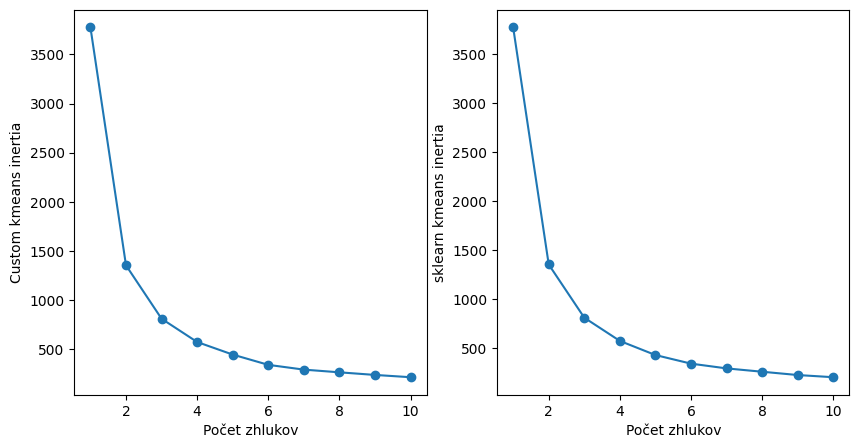

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#plot all inertia values from custom kmeans algorithm
ax1.plot(range(1, 11), custom_inertias, '-o')
ax1.set_ylabel('Custom kmeans inertia')

#plot all inertia values from sklearn kmeans algorithm
ax2.plot(range(1, 11), inertias_sklearn, '-o')
ax2.set_ylabel('sklearn kmeans inertia')

for ax in (ax1, ax2):
    ax.set_xlabel('Počet zhlukov')

plt.show()

Z grafu nie je úplne jasné, ktoré $k$ je optimálne, tak využijeme silhouette skóre.

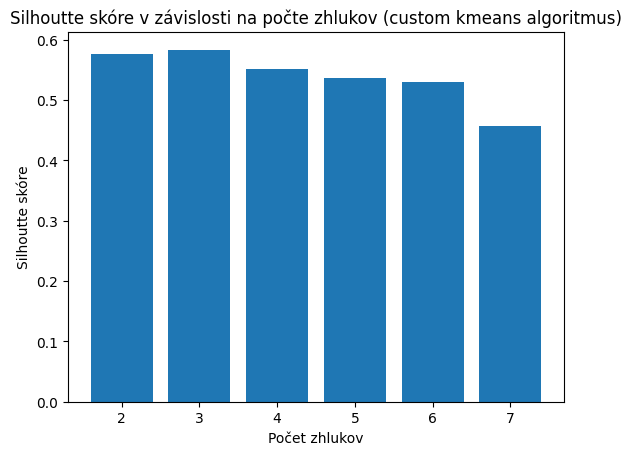

In [16]:
#get silhouette scores for all k's from 2 to 7
silhouette_scores = [silhouette_score(X, kmeans(X, k=i)[1]) for i in range(2, 8)]

#draw a bar plot with all scores
plt.bar(range(2, 8), silhouette_scores)
plt.xticks(range(2, 8))
plt.title('Silhoutte skóre v závislosti na počte zhlukov (custom kmeans algoritmus)')
plt.xlabel('Počet zhlukov')
plt.ylabel('Silhoutte skóre')
plt.show()

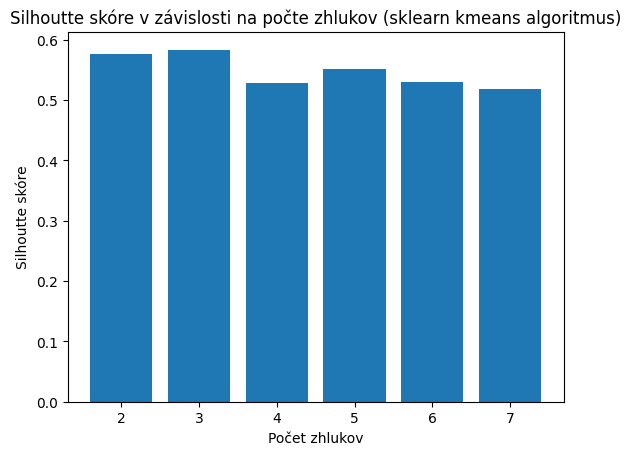

In [17]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:7]]

plt.bar(range(2, 8), silhouette_scores)
plt.xticks(range(2, 8))
plt.title('Silhoutte skóre v závislosti na počte zhlukov (sklearn kmeans algoritmus)')
plt.xlabel('Počet zhlukov')
plt.ylabel('Silhoutte skóre')
plt.show()

#find the maximum and add 2 to index because k := 2 on index 0
optimal_k = np.argmax(silhouette_scores) + 2

#find maximum silhouette score
max_score_kmeans = max(silhouette_scores)

Z týchto grafov už vieme určit, že optimálne $k$ je 3.

In [18]:
kmeans_sklearn = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_sklearn.fit(X)

KMeans(n_clusters=3, random_state=42)

In [19]:
#make new column assigning each value its cluster id
df['cluster_id'] = kmeans_sklearn.labels_

Vizualizácia dát s optimálnym počtom zhlukov.

<AxesSubplot: >

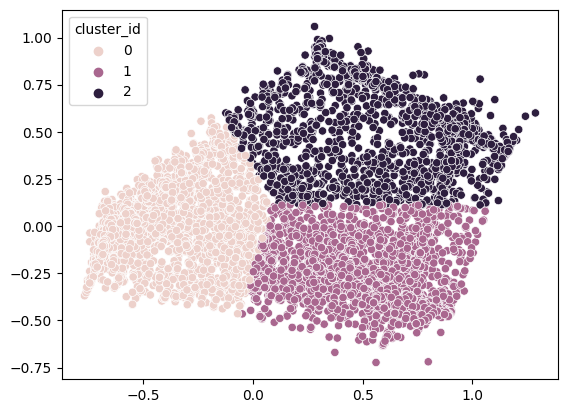

In [20]:
sns.scatterplot(x=PCA1, y=PCA2, hue='cluster_id', data=df)

# Aglomeratívne hierarchické zhlukovanie

Zostrojíme maticu prepojení pomocou funkcie `linkage`.
Vytvoríme vizualizáciu orezaného dendrogramu.

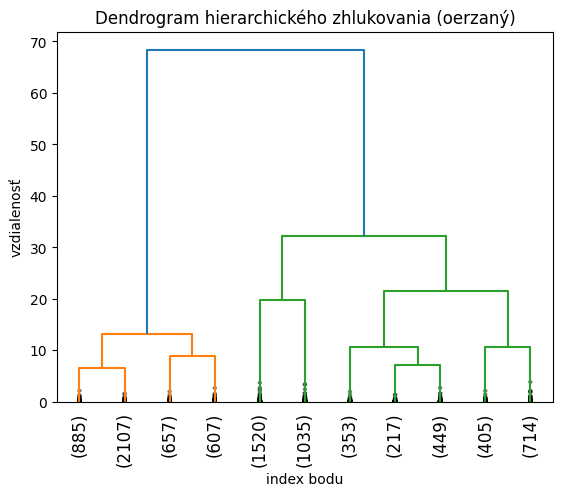

In [21]:
#create a linkage matrix using the ward method
Z = linkage(X, method="ward", metric="euclidean")

plt.title("Dendrogram hierarchického zhlukovania (oerzaný)")
plt.xlabel("index bodu")
plt.ylabel("vzdialenosť")

#draw a dendrogram
dendrogram(
    Z,
    truncate_mode="lastp",  #only shows last p clusters
    p=11,  #sets the p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)

plt.show()

Vizualizácia zhlukov dát pomocou funkcie `fclusters`.

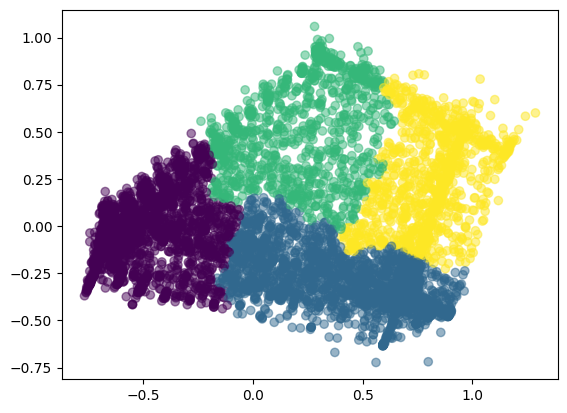

In [22]:
k_clusters = fcluster(Z, 4, criterion="maxclust")

plt.scatter(PCA1, PCA2, c=k_clusters, alpha=0.5)
plt.show()

Na porovnanie s kmeans algoritmom zistíme silhouette skóre dát z funkcie fclusters.

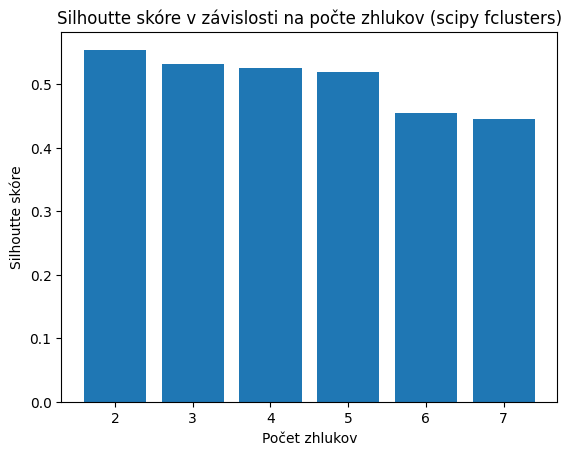

In [23]:
#create clusters for k from 1 to 10
clusters = [fcluster(Z, k, criterion="maxclust") for k in range(1, 11)]

#calculate silhouette score for k from 2 to 7
silhouette_scores = [silhouette_score(X, cluster) for cluster in clusters[1:7]]

plt.bar(range(2, 8), silhouette_scores)
plt.xticks(range(2, 8))
plt.title('Silhoutte skóre v závislosti na počte zhlukov (scipy fclusters)')
plt.xlabel('Počet zhlukov')
plt.ylabel('Silhoutte skóre')
plt.show()

#find maximum silhouette score
max_score_fcluster = max(silhouette_scores)

In [24]:
print(max_score_kmeans, max_score_fcluster)

0.5832085752179238 0.5542439298513124


Vidíme, že skóre je vyššie z algoritmu kmeans, takže pre tieto dáta bude lepšie zhlukovanie pomocou algoritmu kmeans.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c54206ac-a5f6-4a58-9915-1af4e926d394' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>